# Tabla
<table>
  <thead>
    <tr>
      <th>Country</th>
      <th>Population (2022)</th>
      <th>GDP - USD (2022)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>UK</td>
      <td>66.97 million</td>
      <td>3.089 trillion</td>
    </tr>
    <tr>
      <td>Canada</td>
      <td>38.93 million</td>
      <td>2.138 trillion</td>
    </tr>
  </tbody>
</table>


In [19]:
!pip install requests bs4 pandas selenium

In [20]:
# Step 1: Import the libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

In [ ]:
# Step 2: Make a request
try:
   # Step 2: Send a request to the Wikipedia page.
   url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
   response = requests.get(url)
   response.raise_for_status()  # Check if the request was successful.

except requests.exceptions.RequestException as e:
   print(f"Error fetching the webpage: {e}")

In [22]:
# Step 3: Scrape HTML table data and parse it

try:
   # Step 3.1: Parse the HTML content with BeautifulSoup.
   soup = BeautifulSoup(response.content, "html.parser")

   # Step 3.2: Find the specific table (usually the first table under this section).
   table = soup.find_all("table", {"class": "wikitable"})[1]

   # Step 3.3: Read the table into a DataFrame using pandas.
   films_df = pd.read_html(StringIO(str(table)))[0]

except Exception as e:
   print(f"Error parsing the HTML or reading the table: {e}")

In [23]:
# Step 4: Handle headers and clean the data

try:
   # Step 4: Clean up the DataFrame if necessary.
   # Clean up any unwanted rows or columns.
   df = df.dropna(how="all")  # Drop rows with all NaN values.

except Exception as e:
   print(f"Error cleaning or processing the DataFrame: {e}")

Error cleaning or processing the DataFrame: name 'df' is not defined


In [24]:
# Step 5: Save results to a CSV file

if films_df is not None:
   print("Successfully extracted the table!")
   print(films_df)
   # Save the DataFrame to a CSV file.
   file_name = "highest_grossing_films"
   films_df.to_csv(f"{file_name}.csv", index=False)
   print(f"\nData saved to '{file_name}.csv'.")

Successfully extracted the table!
   Rank                         Title Worldwide gross (2023 $)  Year
0     1            Gone with the Wind         GW$4,341,000,000  1939
1     2                        Avatar         A1$3,957,000,000  2009
2     3                       Titanic          T$3,677,000,000  1997
3     4                     Star Wars           $3,563,000,000  1977
4     5             Avengers: Endgame         AE$3,275,000,000  2019
5     6            The Sound of Music           $2,984,000,000  1965
6     7    E.T. the Extra-Terrestrial         ET$2,917,000,000  1982
7     8          The Ten Commandments           $2,758,000,000  1956
8     9                Doctor Zhivago           $2,615,000,000  1965
9    10  Star Wars: The Force Awakens        TFA$2,577,000,000  2015

Data saved to 'highest_grossing_films.csv'.


**Scraping tables with complex headers**

Let’s use another Wikipedia table: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
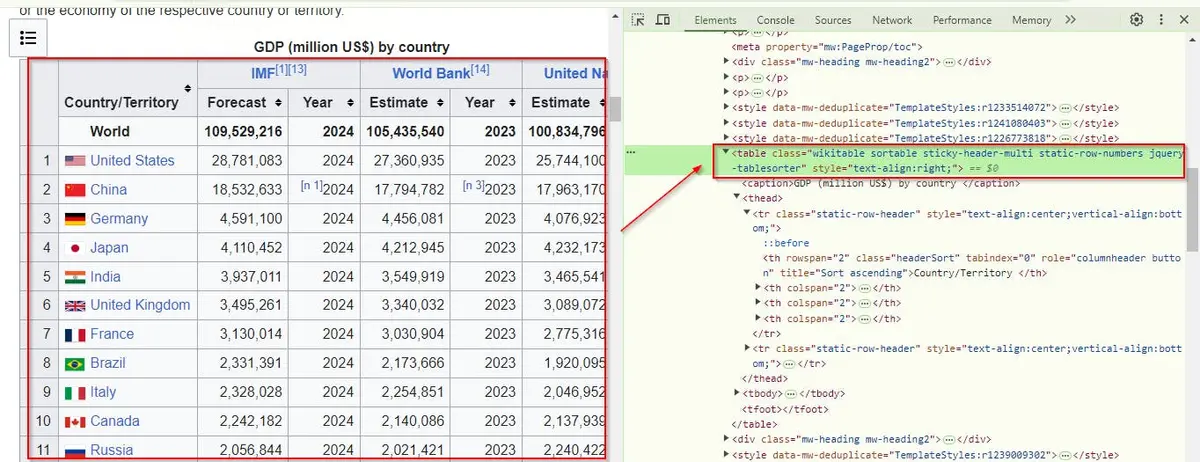